Word2Vec


In [1]:
import pandas as pd
import numpy as np

In [2]:
word=dict()
if word==None:
  print("Hi")

In [3]:
def generate_dictionary(text):#text--list
  corpus=[]
  count=0
  word_to_ids={}
  ids_to_word={}
  for row in text:
    for word in row.split():
      word=word.lower()
      corpus.append(word)
      if word_to_ids.get(word)==None:
        word_to_ids.update({word:count})
        ids_to_word.update({count:word})
        count+=1
  vocab_size=len(word_to_ids)
  length_corpus=len(corpus)
  return word_to_ids,ids_to_word,vocab_size,length_corpus,corpus

In [4]:
text = ["machine learning engineers can build great data models","the more data you have the better your model","these predictions sound right, but it is all about your data","your data can provide great value"]
word_to_ids,ids_to_word,vocab_size,length_corpus,corpus=generate_dictionary(text)

In [5]:
vocab_size

26

In [6]:
def generate_one_hot_code(trg_word,cxt_words,vocab_size,word_to_ids):
  target_word_vector=np.zeros(vocab_size)
  index_target_word=word_to_ids.get(trg_word)
  target_word_vector[index_target_word]=1
  contxt_word_vector=np.zeros(vocab_size)

  for contxt_word in cxt_words:
    index_contxt_word=word_to_ids.get(contxt_word)
    contxt_word_vector[index_contxt_word]=1

  return target_word_vector,contxt_word_vector

In [7]:
for i in range(4,1,-1):
  print(i)

4
3
2


In [21]:
def generate_training_data(window_size,vocab_size,word_to_ids,length_corpus,corpus,sample=None):
  training_data = []
  training_sample_words = []
  target_words_vector=[]
  for i,word in enumerate(corpus):
    target_word=word
    contxt_words=[]
    if i==0:#starting position
      contxt_words=[corpus[x] for x in range(i+1,window_size+1)]
    elif i==length_corpus-1:
      contxt_words=[corpus[x] for x in range(length_corpus-2,length_corpus-2-window_size,-1)]
    else:
      before_target_word=i-1
      for x in range(before_target_word,before_target_word-window_size,-1):
        if(x>=0):
          contxt_words.extend([corpus[x]])

      after_target_word=i+1
      for x in range(after_target_word,after_target_word+window_size):
        if(x<len(corpus)):
          contxt_words.extend([corpus[x]])

    target_word_vector,contxt_word_vector=generate_one_hot_code(target_word,contxt_words,vocab_size,word_to_ids)
    training_data.append([target_word_vector, contxt_word_vector])
    target_words_vector.append(target_word_vector)
    if sample is not None:
      training_sample_words.append([target_word, contxt_words])
  return target_words_vector,training_data, training_sample_words
      

In [22]:
target_words_vector,training_data,training_samples=generate_training_data(2,vocab_size,word_to_ids,length_corpus,corpus,sample=None)

In [23]:
training_data

[[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 [array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 [array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 [array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 [ar

In [24]:
training_samples

[]

In [25]:
weights_input_hidden = np.random.uniform(-1, 1, (26, 5))
weights_input_hidden

array([[ 9.04582822e-01,  6.17377397e-01,  3.45007832e-01,
        -8.59126107e-01,  1.62583972e-01],
       [-8.63352563e-01, -8.60382402e-01,  9.77426885e-01,
         6.32189829e-01,  2.55972916e-01],
       [-7.80190943e-01,  5.35097053e-02, -6.12728450e-01,
        -6.90928341e-02,  4.75012187e-01],
       [ 6.91713356e-01, -9.22624891e-01,  6.58595856e-01,
         9.69762865e-03,  3.88461929e-01],
       [ 9.10208119e-01, -1.16667317e-01, -8.47284808e-01,
         6.17604306e-01, -4.79710423e-01],
       [-6.03176303e-01,  2.71322807e-01, -1.05378368e-01,
        -9.60968497e-01, -2.37223173e-01],
       [-2.74084209e-02, -1.54464379e-01, -8.52786083e-01,
        -9.72672146e-01,  2.57319907e-01],
       [-3.59755405e-01,  3.62854620e-01,  3.63813047e-04,
         2.88155683e-01,  8.20730660e-01],
       [ 4.91406327e-01,  7.20489882e-01,  1.21932070e-01,
        -5.75503187e-01,  5.51953441e-02],
       [ 8.81208616e-01,  2.31047429e-02,  2.79688195e-01,
        -5.90316004e-01

In [26]:
def softmax(x):
  exp=np.exp(x-np.max(x))
  return exp/exp.sum(axis=0)

In [27]:
def forward_prop(weight_inp_hidden,weight_out_hidden,target_word_vector):
  hidden_layer=np.dot(target_word_vector,weight_inp_hidden)

  u=np.dot(hidden_layer,weight_out_hidden)

  y_pred=softmax(u)

  return y_pred,hidden_layer,u



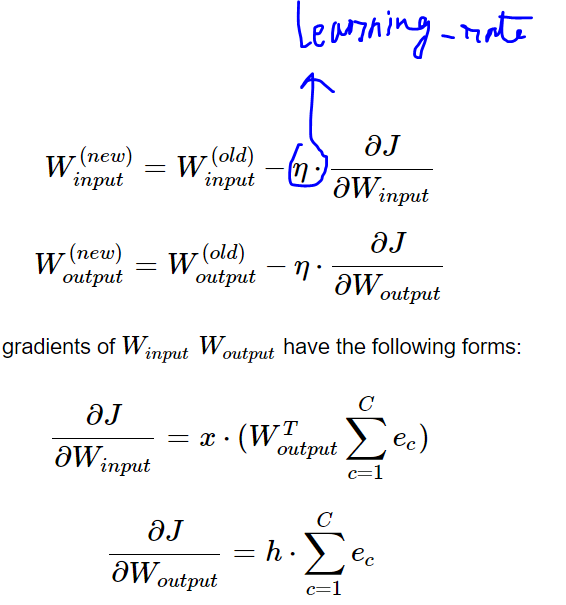

In [42]:
def backward_prop(weight_inp_hidden,hidden_layer,weight_out_hidden,total_error,target_word_vector,learning_rate):
  d_weight_inp_hidden=np.outer(target_word_vector,np.dot(weight_out_hidden,total_error.T))
  d_weight_out_hidden=np.outer(hidden_layer,total_error)

  weight_inp_hidden=weight_inp_hidden-(learning_rate*d_weight_inp_hidden)
  weight_out_hidden=weight_out_hidden-(learning_rate*d_weight_out_hidden)

  return weight_inp_hidden,weight_out_hidden

In [43]:
def calculate_error(y_pred,cxt_words):
  total_error=[None]*len(y_pred)
  index_1_in_cxt_word={}
  for index in np.where(cxt_words==1)[0]:
    index_1_in_cxt_word.update({index:'yes'})
  num_1_in_cxt_word=len(index_1_in_cxt_word)  
  for index,value in enumerate(y_pred):
    if index_1_in_cxt_word.get(index)!=None:
      total_error[index]=(value-1)+((num_1_in_cxt_word-1)*value)
    else:
      total_error[index]=(value*num_1_in_cxt_word)
  return np.array(total_error)

In [44]:
def train(word_embedding_dimension, window_size, epochs, training_data, learning_rate):
    weights_input_hidden = np.random.uniform(-1, 1, (26, 5))
    weights_hidden_output = np.random.uniform(-1, 1, (5, 26))

    
    weights_1 = []
    weights_2 = []

    for epoch in range(epochs):
        loss = 0

        for target, context in training_data:
            y_pred, hidden_layer, u = forward_prop(weights_input_hidden, weights_hidden_output, target)

            total_error = calculate_error(y_pred, context)

            weights_input_hidden, weights_hidden_output = backward_prop(
                weights_input_hidden, hidden_layer,weights_hidden_output, total_error, target, learning_rate
            )

            

        
        weights_1.append(weights_input_hidden)
        weights_2.append(weights_hidden_output)


    return np.array(weights_1), np.array(weights_2)

In [45]:
w1,w2=train(5,5,100,training_data,0.01)

In [51]:
w1[word_to_ids['machine']]

array([[ 9.69926060e-01, -3.45649371e-01,  4.77518091e-01,
         2.15565230e-01, -1.06081921e-01],
       [ 3.67636314e-01,  2.92511090e-01,  5.66459445e-01,
         6.58026271e-02,  2.85399455e-01],
       [-3.06186927e-01, -9.12256595e-01,  1.67561995e-01,
         2.81571441e-01, -6.86726902e-01],
       [ 8.76142246e-01,  4.72030576e-01, -7.37007804e-01,
        -7.40890458e-01, -1.66810958e-01],
       [ 9.20906385e-01,  7.42444731e-01,  7.81059321e-01,
         8.23669966e-01, -3.27169561e-01],
       [-9.36929440e-01, -5.59872018e-01,  6.08560792e-01,
        -7.55264706e-01, -5.81124714e-01],
       [ 9.52273199e-01,  2.80571988e-03,  2.77538531e-01,
         3.65358530e-01, -7.26845502e-01],
       [-4.58322135e-01, -8.04811120e-02,  2.93067612e-01,
         9.12422690e-01,  6.70845184e-01],
       [-7.17428168e-01, -8.80242113e-01,  5.49469013e-01,
         4.47104389e-01,  8.21960512e-01],
       [-7.35755625e-01,  3.12190707e-01, -7.49696767e-01,
        -6.62632365e-01

In [52]:
w1[word_to_ids['learning']]

array([[ 0.9686706 , -0.356059  ,  0.46363658,  0.23191054, -0.11651558],
       [ 0.36534458,  0.28980205,  0.57013134,  0.07528017,  0.27429796],
       [-0.31062377, -0.89901113,  0.17320335,  0.27730156, -0.68767421],
       [ 0.83120148,  0.44944706, -0.72412549, -0.71616833, -0.16982448],
       [ 0.89875347,  0.74303177,  0.7826308 ,  0.83430405, -0.32373826],
       [-0.94492926, -0.53826998,  0.61240562, -0.74123635, -0.56163963],
       [ 0.93587132,  0.03427697,  0.28401189,  0.3414968 , -0.68647875],
       [-0.45320862, -0.06116928,  0.29802162,  0.89611622,  0.66342202],
       [-0.6853464 , -0.87360942,  0.54940325,  0.43032695,  0.82475945],
       [-0.71898564,  0.31733848, -0.72706222, -0.66637757,  0.54650707],
       [-0.93687983, -0.4590249 , -0.72059576, -0.38247079,  0.99243272],
       [ 0.64188196,  0.15459474,  0.76022804,  0.91778441,  0.82698811],
       [-0.84733349,  0.76867396,  0.7711437 , -0.4447616 ,  0.0270635 ],
       [-0.25190683, -0.58490401,  0.3

from the above vectors we could see how similar words "machine" and "learning" are